# Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns

In [2]:
train_dataset_oh = pd.read_csv('C:/Users/Postb/Documents/GitHub/IDS/data/train_insurance_one_hot.csv')
x_train = train_dataset_oh.drop(columns=['id','charges','chargeGroup'], inplace=False)
y_train = train_dataset_oh[["charges"]]

test_dataset_oh = pd.read_csv('C:/Users/Postb/Documents/GitHub/IDS/data/test_insurance_one_hot.csv')
x_test = test_dataset_oh.drop(columns=['id','charges','chargeGroup'], inplace=False)
y_test = test_dataset_oh[["charges"]]

## a)

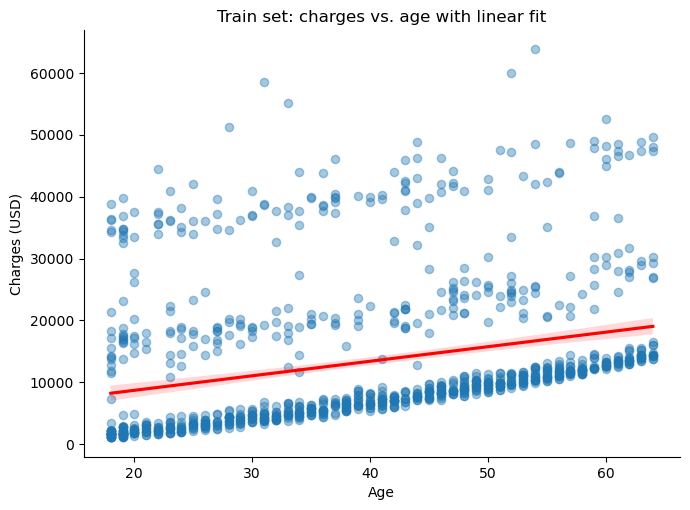

,age,charges
count,1070.00,1070.00
mean,39.52,13295.76
std,14.14,11912.22
min,18.00,1121.87
25%,27.00,4856.16
50%,40.00,9632.47
75%,52.00,16728.85
max,64.00,63770.43


In [4]:
# Charges vs. age with linear trend
age_charge_df = train_dataset_oh[['age', 'charges']].copy()
sns.lmplot(
    data=age_charge_df,
    x='age',
    y='charges',
    height=5,
    aspect=1.4,
    scatter_kws={'alpha': 0.4, 's': 35},
    line_kws={'color': 'red'},
)
plt.title('Train set: charges vs. age with linear fit')
plt.xlabel('Age')
plt.ylabel('Charges (USD)')
plt.show()
age_charge_df.describe().round(2)


The trend line slopes upward, but the scatter remains very wide, so people at the same age can have charges that differ by tens of thousands of dollars.
Because smoking status, BMI, and dependents strongly influence charges, a simple linear model on age alone would ignore most variance.
Therefore, age-only linear regression would be a poor fit, useful perhaps for spotting the general direction but not for accurate predictions.


## b)

In [7]:
# Linear regression on full one-hot features
linreg = LinearRegression()
linreg.fit(x_train, y_train)

coef_df = (
    pd.DataFrame(
        {
            'feature': x_train.columns,
            'coefficient': linreg.coef_.ravel(),
        }
    )
    .assign(abs_coef=lambda df: df['coefficient'].abs())
    .sort_values('abs_coef', ascending=False)
    .drop(columns='abs_coef')
)
print('Linear regression coefficients (sorted by absolute value):')
with pd.option_context('display.float_format', '{:.2f}'.format):
    display(coef_df.reset_index(drop=True))


train_predictions = linreg.predict(x_train)
test_predictions = linreg.predict(x_test)
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
print(f"Train MAE: ${train_mae:,.2f}")
print(f"Test MAE: ${test_mae:,.2f}")

# Save coefficient table as an image for easy reference
from pathlib import Path
coef_fig, ax = plt.subplots(figsize=(10, 0.4 * len(coef_df) + 1))
ax.axis('off')
table = ax.table(
    cellText=coef_df.values,
    colLabels=coef_df.columns,
    loc='center',
    cellLoc='left',
)
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 1.5)
coef_path = Path('templates_jupyter_notebooks(1)/artifacts/q4_coefficients.png')
coef_path.parent.mkdir(parents=True, exist_ok=True)
coef_fig.tight_layout()
coef_fig.savefig(coef_path, dpi=200, bbox_inches='tight')
plt.close(coef_fig)
print(f"Saved coefficient screenshot to {coef_path}")

train_mae, test_mae


Linear regression coefficients (sorted by absolute value):


,feature,coefficient
0,smoker_no,-11793.39
1,smoker_yes,11793.39
2,region_northeast,622.32
3,region_southeast,-536.06
4,children,376.80
5,bmi,354.41
6,region_southwest,-261.71
7,age,257.53
8,region_northwest,175.45
9,sex_male,-38.44


Train MAE: $4,186.98
Test MAE: $4,306.85
Saved coefficient screenshot to templates_jupyter_notebooks(1)\artifacts\q4_coefficients.png


(4186.977123130027, 4306.846407886611)

Train MAE: **$4,186.98**, Test MAE: **$4,306.85** (rounded to cents).
`LinearRegression` captures smoking status as the dominant effect (see coefficients), but several other features contribute smaller adjustments, so residuals of several thousand dollars remain.
![Coefficient table](artifacts/q4_coefficients.png)
